In [0]:
import tensorflow as tf
data=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data() 

0


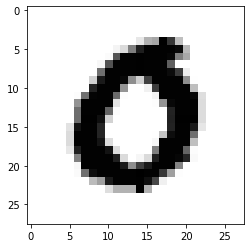

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 8000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [26]:
x_train.shape

(60000, 28, 28)

In [29]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 40s 662us/step - loss: 0.5788 - acc: 0.8262
Epoch 2/30
60000/60000 [==============================] - 39s 645us/step - loss: 0.2257 - acc: 0.9323
Epoch 3/30
60000/60000 [==============================] - 39s 656us/step - loss: 0.1655 - acc: 0.9506
Epoch 4/30
60000/60000 [==============================] - 39s 646us/step - loss: 0.1353 - acc: 0.9594
Epoch 5/30
60000/60000 [==============================] - 39s 648us/step - loss: 0.1150 - acc: 0.9651
Epoch 6/30
60000/60000 [==============================] - 39s 657us/step - loss: 0.1009 - acc: 0.9693
Epoch 7/30
60000/60000 [==============================] - 40s 663us/step - loss: 0.0912 - acc: 0.9723
Epoch 8/30
60000/60000 [==============================] - 41s 680us/step - loss: 0.0840 - acc: 0.9742
Epoch 9/30
60000/60000 [==============================] - 41s 679us/step - loss: 0.0777 - acc: 0.9758
Epoch 10/30
60000/60000 [==============================] - 41s 676us/step - loss: 

In [41]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 208us/step


[0.05642137635567779, 0.9843]

6


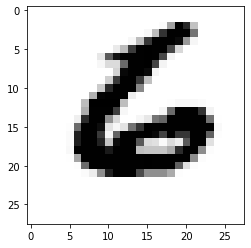

In [48]:
image_index = 9999
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28, 1))
print(pred.argmax())